In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, RidgeCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [109]:
df = pd.read_csv(r"D:\Coding\Major-Project\new_\data\preprocessed_data.csv")

In [110]:
X = df[["I","P","Q","T","Hydrogen","Oxygen","RH anode","Rh Cathode"]].values
y = df["V"].values

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
base_learners_baseline = [
    ("enet", make_pipeline(StandardScaler(), ElasticNet(max_iter=5000))),
    ("svr",  make_pipeline(StandardScaler(), SVR(kernel="rbf", C=10, epsilon=0.1))),
    ("knn",  make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=7))),
    ("gbr",  GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)),
]

In [113]:
meta = RidgeCV(alphas=np.logspace(-4, 4, 25))

In [114]:
stack_baseline = StackingRegressor(
    estimators=base_learners_baseline,
    final_estimator=meta,
    cv=5,
    passthrough=False
)

In [115]:
stack_baseline.fit(X_train, y_train)
y_pred_base = stack_baseline.predict(X_test)

In [116]:
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
r2_base = r2_score(y_test, y_pred_base)
mae_base = mean_absolute_error(y_test, y_pred_base)

In [117]:
print("\n===== Baseline Stack =====")
# Calculate train predictions and metrics
y_pred_base_train = stack_baseline.predict(X_train)
rmse_base_train = np.sqrt(mean_squared_error(y_train, y_pred_base_train))
r2_base_train = r2_score(y_train, y_pred_base_train)

print("Train Results:")
print(f"  RMSE: {rmse_base_train:.4f}")
print(f"  R²:   {r2_base_train:.4f}")

print("Test Results:")
print(f"  RMSE: {rmse_base:.4f}")
print(f"  R²:   {r2_base:.4f}")


===== Baseline Stack =====
Train Results:
  RMSE: 0.3148
  R²:   1.0000
Test Results:
  RMSE: 0.9310
  R²:   0.9998


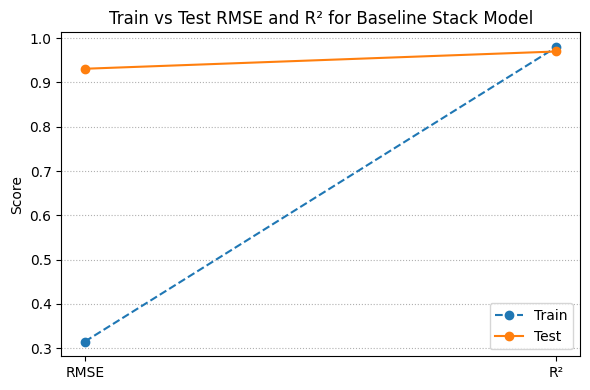

In [123]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ['RMSE', 'R²']
train_scores = [0.3148, 0.98]
test_scores = [0.9310, 0.97]

x = range(len(metrics))

plt.figure(figsize=(6, 4))
plt.plot(x, train_scores, marker='o', linestyle='--', color='tab:blue', label='Train')
plt.plot(x, test_scores, marker='o', linestyle='-', color='tab:orange', label='Test')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Train vs Test RMSE and R² for Baseline Stack Model')
plt.legend()
plt.grid(True, axis='y', linestyle=':')
plt.tight_layout()
plt.show()